In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import os
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [53]:
URL = "https://www.oryxspioenkop.com/2022/02/attack-on-europe-documenting-equipment.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="post-body-8087922975012177708")

In [54]:
all_h3 = soup.find_all('h3')

In [55]:
equipment_types_auto_tmp = []
equipment_types_auto = []

In [56]:
for h3 in all_h3:
    if not 'Ukraine' in h3.get_text() and not 'Russia' in h3.get_text():
        equipment_type = h3.get_text().partition("(")[0]
        equipment_type = re.sub(r"\s$", "", equipment_type)
        equipment_types_auto_tmp.append([equipment_type])
        
for i in equipment_types_auto_tmp:
    if i not in equipment_types_auto:
        equipment_types_auto.append(i)
        
equipment_types_auto = [val for sublist in equipment_types_auto for val in sublist]
equipment_types_auto.remove('')

In [57]:
equipment_types_auto

['Tanks',
 'Armoured Fighting Vehicles',
 'Infantry Fighting Vehicles',
 'Armoured Personnel Carriers',
 'Mine-Resistant Ambush Protected',
 'Infantry Mobility Vehicles',
 'Communications Stations',
 'Engineering Vehicles',
 'Anti-Tank Guided Missiles',
 'Man-Portable Air Defence Systems',
 'Heavy Mortars',
 'Towed Artillery',
 'Self-Propelled Artillery',
 'Multiple Rocket Launchers',
 'Anti-Aircraft Guns',
 'Self-Propelled Anti-Aircraft Guns',
 'Surface-To-Air Missile Systems',
 'Radars',
 'Jammers And Deception Systems',
 'Aircraft',
 'Unmanned Aerial Vehicles',
 'Helicopters',
 'Logistics Trains',
 'Trucks, Vehicles and Jeeps',
 'Anti-tank Guided Missiles',
 'Naval Ships']

In [58]:
equipment_subtypes_auto_tmp = []
equipment_subtypes_auto = []

In [59]:
all_li = soup.find_all('li', attrs={'class': None})

In [60]:
for li in all_li:
    equipment_subtype = re.search(r'(.*):', li.get_text())
    if equipment_subtype is not None:
        equipment_subtype = equipment_subtype.group(0)
        equipment_subtype = re.sub("^ \d+", "", equipment_subtype)
        equipment_subtype = re.sub(":", "", equipment_subtype)
        equipment_subtype = re.sub(r"^\s", "", equipment_subtype)
        equipment_subtypes_auto_tmp.append([equipment_subtype])

for i in equipment_subtypes_auto_tmp:
    if i[0] not in equipment_subtypes_auto:
        equipment_subtypes_auto.append(i[0])

In [61]:
equipment_subtypes_auto

['T-64BV',
 'T-72A',
 'T-72AV',
 'T-72B',
 'T-72B Obr. 1989',
 'T-72B3',
 'T-72B3 Obr. 2016',
 'T-80BV',
 'T-80U',
 'T-80UK',
 'T-80BVM',
 'T-90A',
 'Unknown tank',
 'BRM-1K',
 'BMP-1Khs',
 'MT-LB',
 'MT-LB with ZU-23 AA gun',
 'MT-LBM 6MB',
 'MT-LB Ambulance',
 'MT-LBu',
 '1V13 battery fire control center',
 'Vityaz DT-30 articulated tracked carrier',
 '2S1 with ZU-23 AA gun',
 '9P149 Shturm-S ATGM carrier',
 'BMD-1KSh-A command vehicle',
 'R-149MA1 unified command and staff vehicle',
 'R-149MA3 command and staff vehicle',
 '1V119 artillery battalion fire direction vehicle',
 'TZM-T reloader vehicle (for TOS-1A)',
 'Unknown BTR-D/BMD-2',
 'Unknown AFV',
 'BMP-1(P)',
 'BMP-2',
 'BMP-2K',
 'BMP-3',
 'BMD-2',
 'BMD-4M',
 'BTR-82A',
 'BTR-80',
 'BTR-D',
 "BTR-MDM 'Rakushka'",
 "KamAZ-63968 'Typhoon'",
 'K-53949 Typhoon-K',
 "K-53949 'Linza'",
 'GAZ Tigr-M',
 "Iveco LMV 'Rys'",
 'MP-2IM signals vehicle',
 'Barnaul-T 9С932-1 automated system for air defence units',
 'R-166-0.5 signals vehic

In [62]:
status_types_auto_tmp = []
status_types_auto = []

In [63]:
all_a = soup.find_all('a')

In [64]:
for a in all_a:
    status = re.search(r"\((.*)\)", a.get_text())
    if status is not None: 
        status = status.group(0)
        status = re.sub("\(", "", status)
        status = re.sub("\)", "", status)
        status = re.search(r"([^\,]+$)", status)
        status = status.group(0)        
        status = re.sub(r"^\s", "", status)
        status_types_auto_tmp.append([status])

for i in status_types_auto_tmp:
    if i[0] not in status_types_auto:
        status_types_auto.append(i[0])

In [65]:
status_types_auto

['damaged',
 'captured',
 'destroyed',
 'captured and later destroyed',
 'damaged and abandoned',
 'abandoned',
 'damaged and captured',
 'captured and stripped',
 'abandoned and later destroyed',
 '33 captured',
 'abandoned and destroyed',
 'destroyed by Bayraktar TB2',
 'captured and destroyed',
 '2 and 3 destroyed',
 'damaged by Bayraktar TB2',
 'destroyed on the ground',
 'damaged by Bayraktar TB2 and captured',
 'abandoned and later burned',
 'scuttled to prevent capture by Russia',
 'sunk',
 'Atom',
 'Yemen',
 'Russia',
 'Palestine']

In [66]:
for h3 in all_h3:
    if h3.get_text().count('Ukraine') == 1:
        all_russian = h3.find_all_previous()
        all_ukraine = h3.find_all_next()

all_russian_all_ukraine = [all_russian, all_ukraine]

In [67]:
list_tmp = []

In [68]:
country = 'RUS'

for section in all_russian_all_ukraine:
        
    if all_russian_all_ukraine.index(section) == 1:
        country = 'UKR'
    
    for element in section:

        if element.name == 'h3':
            
            for equipment_type_i in equipment_types_auto:
                
                equipment_type = element.get_text().partition("(")[0]
                equipment_type = re.sub(r"\s$", "", equipment_type)
                
                if equipment_type_i == equipment_type:
                    current_type = equipment_type_i
                
            ul = element.nextSibling.nextSibling
            
            try:
              li_list = ul.find_all('li')
            except:
                pass
            
            for li in li_list:
                li_a_list = li.find_all('a')
                
                for equipment_subtype_i in equipment_subtypes_auto:
                    
                    equipment_subtype = re.search(r'(.*):', li.get_text())
                    if equipment_subtype is not None:
                        
                        equipment_subtype = equipment_subtype.group(0)
                        equipment_subtype = re.sub("^ \d+", "", equipment_subtype)
                        equipment_subtype = re.sub(":", "", equipment_subtype)
                        equipment_subtype = re.sub(r"^\s", "", equipment_subtype)
                        
                        if equipment_subtype_i == equipment_subtype:
                            current_subtype = equipment_subtype_i
                
                for status_i in status_types_auto:
                
                    for single_report in li_a_list:
                        current_a_text = single_report.get_text()
                        current_a_text = re.sub("\(", "", current_a_text)
                        current_a_text = re.sub("\)", "", current_a_text)  
                        current_a_text = re.search(r"([^\,]+$)", current_a_text)
                        try:
                            current_a_text = current_a_text.group(0)
                            current_a_text = re.sub(r"^\s", "", current_a_text)
                            if status_i == current_a_text:
                                list_tmp.append([country, current_type, current_subtype, current_a_text, single_report['href']])
                        except:
                            pass
                        


In [69]:
df = pd.DataFrame(list_tmp, columns=['country', 'equipment_type', 'equipment_subtype', 'satus', 'source'])

In [ ]:
df

In [ ]:
cwd = os.getcwd()
now = datetime.now()
dt_string = now.strftime("%Y%m%d%H%M")
path = cwd + '/export_' + dt_string + '.csv'
df.to_csv(path)

In [71]:
sr_equipment_type = df[["country", "equipment_type"]].groupby(["country", "equipment_type"]).size()

In [72]:
df_equipment_type = sr_equipment_type.to_frame()

In [73]:
df_equipment_type = df_equipment_type.reset_index()

In [74]:
df_equipment_type.columns = [*df_equipment_type.columns[:-1], 'frequency']

In [75]:
df_equipment_type.loc[df_equipment_type['country']=='RUS', 'RUS'] = df_equipment_type['frequency']
df_equipment_type.loc[df_equipment_type['country']=='UKR', 'UKR'] = df_equipment_type['frequency']

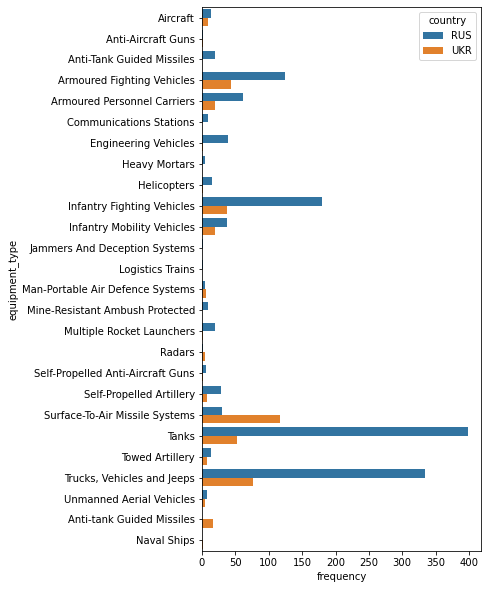

In [76]:
fig, ax = plt.subplots(figsize=(5,10))
g = sns.barplot(x="frequency", y="equipment_type", hue='country', data=df_equipment_type)